In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', grid=False, ticks=True)

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2023-04-23 01:13:03.652672: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 01:13:04.266991: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
df = pd.read_csv('CustomerChurn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df[df['TotalCharges'].isna()].index

Index([], dtype='int64')

In [15]:
df1 = df[df['TotalCharges']!=' ']

In [16]:
df1[pd.to_numeric(df1['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df = df1

In [18]:
%who

df	 df1	 gpu	 gpus	 jtplot	 np	 pd	 plt	 sns	 
tf	 


In [19]:
del df1

In [20]:
%who

df	 gpu	 gpus	 jtplot	 np	 pd	 plt	 sns	 tf	 



In [21]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [22]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<Axes: xlabel='tenure', ylabel='Count'>

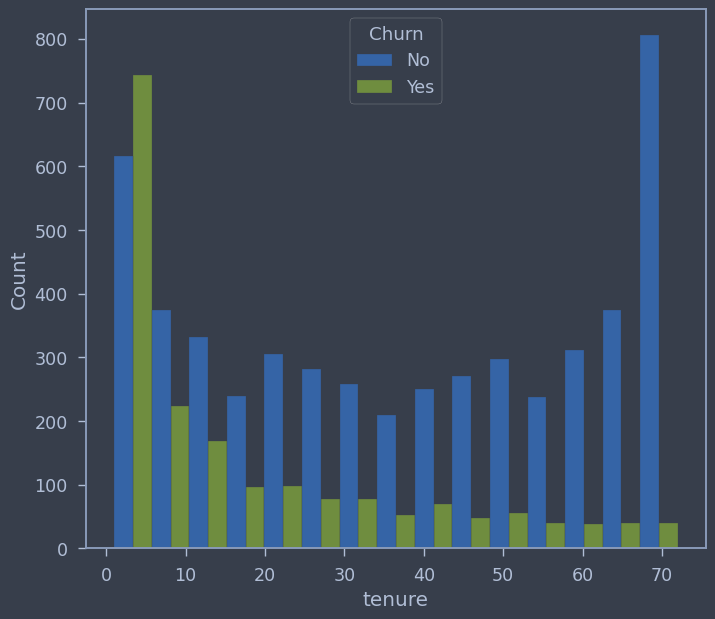

In [23]:
sns.histplot(x='tenure', data=df, hue='Churn',multiple='dodge')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

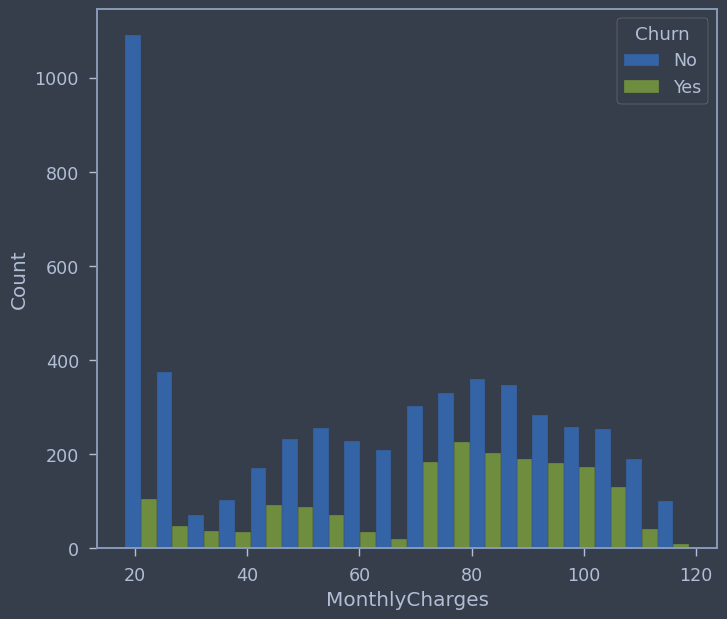

In [24]:
sns.histplot(x='MonthlyCharges', data=df, hue='Churn',multiple='dodge')

In [29]:
for columns in df:
    if df[columns].dtype == 'object':
        print(f'{columns}: {df[columns].unique()}')

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
df.replace('No internet service', 'No', inplace=True)

In [27]:
df.replace('No phone service', 'No', inplace=True)

In [28]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [35]:
for columns in df:
     print(f'{columns}: {df[columns].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [32]:
df.replace({'Male': 1, 'Female':0}, inplace=True)

In [34]:
df['InternetService'].replace(0, 'No', inplace=True)

In [38]:
df1 = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype='int64')
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
df = df1

In [41]:
del df1

In [43]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [44]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [47]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [48]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [51]:
X_train.shape

(5625, 26)

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=26, activation='relu', input_shape=(26,)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 2ms/step - loss: 0.6049 - accuracy: 0.7074
Epoch 2/200
176/176 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7431
Epoch 3/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7527
Epoch 4/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7602
Epoch 5/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7639
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7609
Epoch 7/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7748
Epoch 8/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7687
Epoch 9/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7719
Epoch 10/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4521 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8023
Epoch 82/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8037
Epoch 83/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8027
Epoch 84/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8025
Epoch 85/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8007
Epoch 86/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8011
Epoch 87/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.7984
Epoch 88/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4180 - accuracy: 0.8012
Epoch 89/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8032
Epoch 90/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 

176/176 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8041
Epoch 161/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8057
Epoch 162/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.7980
Epoch 163/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.7980
Epoch 164/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8043
Epoch 165/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8048
Epoch 166/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8044
Epoch 167/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7996
Epoch 168/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.7964
Epoch 169/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - a

In [80]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 802us/step - loss: 0.4318 - accuracy: 0.7903


[0.4318472743034363, 0.7903340458869934]

In [81]:
yp = model.predict(X_test)

44/44 [==============================] - 0s 543us/step


In [82]:
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [83]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1030
           1       0.63      0.51      0.57       377

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

